In [1]:
import numpy as np
from scipy.stats import norm
from scipy.special import expit
import matplotlib.pyplot as plt
from IPython.display import HTML
from itertools import product
import matplotlib.animation

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
tuned_ang = np.array([[45, 0], [135, 0], [225, 0], [315, 0], 
                         [0, 45], [180, 45], [0, -45], [180, -45], 
                         [90, 45], [270, 45], [90, -45], [270, -45]])
tuned_ang = tuned_ang / 180 * np.pi
tuned_vec = np.stack((np.cos(tuned_ang[:, 0]), np.sin(tuned_ang[:, 0]), 
                      np.tan(tuned_ang[:, 1])), axis=-1)
tuned_vec /= np.linalg.norm(tuned_vec, axis=-1)[:, None]
tuned_vec[np.abs(tuned_vec) < 1e-10] = 0
assert (np.linalg.norm(tuned_vec, axis=-1) == 1).all()

(-1.0, 1.0)

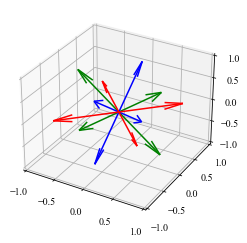

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zeros = np.zeros(4)
for t, c in zip(range(3), ('r', 'g', 'b')):
    i, j = t*4, (t+1)*4
    ax.quiver(zeros, zeros, zeros, tuned_vec[i:j, 0], tuned_vec[i:j, 1], tuned_vec[i:j, 2], color=c)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

In [4]:
tuned_hd = np.tile(np.linspace(0, np.pi*2, num=4, endpoint=False), (3, 1)) # Azimuth, pitch, yaw

In [5]:
T = 1000
ego = np.zeros((T, 12, 3, 4)).reshape(T, -1) # Tuned to motion dir w.r.t. hd and hd
allo = np.zeros((T, 12)) # Tuned to motion dir w.r.t. ground

((2500, 3), (12, 3))

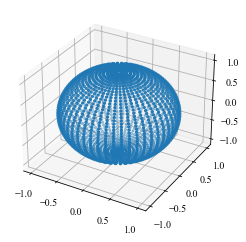

In [84]:
ang = np.meshgrid(np.linspace(0, np.pi * 2, num=50, endpoint=False), 
                  np.linspace(-np.pi/2, np.pi/2, num=50, endpoint=False))
ang = np.stack(ang, axis=-1).reshape(-1, 2)
vec = np.stack((np.cos(ang[:, 1]) * np.cos(ang[:, 0]), 
                np.cos(ang[:, 1]) * np.sin(ang[:, 0]), 
                np.sin(ang[:, 1])), axis=-1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(vec[:, 0], vec[:, 1], vec[:, 2], s=5)
vec_norm = np.linalg.norm(vec, axis=-1)
vec /= vec_norm[:, None]
vec.shape, tuned_vec.shape

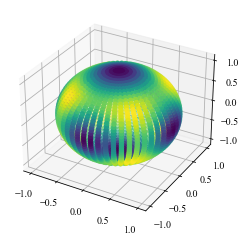

Signature: plt.colorbar(mappable=None, cax=None, ax=None, **kw)
Docstring:
Add a colorbar to a plot.

Function signatures for the :mod:`~matplotlib.pyplot` interface; all
but the first are also method signatures for the `~.Figure.colorbar` method::

  colorbar(**kwargs)
  colorbar(mappable, **kwargs)
  colorbar(mappable, cax=cax, **kwargs)
  colorbar(mappable, ax=ax, **kwargs)

Parameters
----------
mappable
    The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.AxesImage`,
    `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
    This argument is mandatory for the `.Figure.colorbar` method but optional
    for the `.pyplot.colorbar` function, which sets the default to the current
    image.

    Note that one can create a `.ScalarMappable` "on-the-fly" to generate
    colorbars not attached to a previously drawn artist, e.g. ::

        fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

cax : `~matplotlib.axes.Axes`, optional
    Axes into which 

In [89]:
dist = np.linalg.norm(vec[:, None] - tuned_vec[None, ...], axis=-1)
gaus = np.exp(-(dist)**2/2/(np.pi/2)**2)
gmm = gaus.sum(axis=-1)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(vec[:, 0], vec[:, 1], vec[:, 2], c=gmm)
plt.colorbar?

In [73]:
diff[:, 1].max()

3.8013271108436504